<h2 align="center">Simulación del efecto de un polo adicional y cero adicional en sistemas de primer orden</h2>

<h3 align="center">Rebecca García Durán • Luis Alberto López Durán • Jorge Méndez Pantoja • Irving Sierra Hernández</h3>

<h4>Se propone el siguiente problema</h4>

a) Realizar una simulación donde se agregue un polo adicional al sistema de primer orden $\scriptsize G(s)=\frac{5}{s+3}$ y mover el polo a la derecha e izquierda del polo de primer orden y comparar con la respuesta del sistema original. Analizar los resultados y obtener sus conclusiones.

b) Elija un polo adicional de tal manera que el sistema dominante sea el sistema de primer orden original, y ahora agregue un cero adicional y mueva el cero para ver el efecto del mismo, comparándola con la respuesta del sistema dominante de primer orden. Analizar los resultados y obtener sus conclusiones.

Primeramente, se debe encontrar la respuesta en el tiempo de la función de transferencia original, para tener con qué comparar las otras cuatro. Para esto, recordamos que la respuesta del sistema en la frecuencia, cuando se alimenta con una señal escalón unitario.

\begin{equation*}
    Y(s)=\frac{1}{s}G{s}
\end{equation*}

Aplicándolo a nuestro sistema, obtenemos que

\begin{equation*}
    Y(s)=\frac{5}{s(s+3)}=\frac{A}{s}+\frac{B}{s+3}
\end{equation*}



In [1]:
import sympy as sym
import matplotlib.pyplot as plt
import numpy as np
import pprint

t = sym.Symbol('t')
s = sym.Symbol('s')

Gs_original = 5/(s + 3)              #Función de transferencia original
Ys_original = (1/s) * Gs_original    #Función de transferencia multiplicada por la señal escalón unitario

Encontramos el valor de A y lo evalúamos en $s=0$ y $s=-3$, respectivamente para que en la expresión anterior los denominadores se hagan cero. 

\begin{equation*}
    A=\frac{5}{s+3}=\frac{5}{0+3}=\frac{5}{3} \\
    B=\frac{5}{s}=\frac{5}{-3}=-\frac{5}{3}
\end{equation*}

In [2]:
As = s * Ys_original                 #Despejar A y B de las fracciones parciales
Bs = (s + 3) * Ys_original           

A = sym.sympify(As).subs(s, 0)       #Se evalúa en 0 y -3 para hacer cero el denominador del primer y segundo términos de Y(s)
B = sym.sympify(Bs).subs(s, -3)

Obtenidos estos resultados, podemos sustituir los valores encontrados en la función $Y(s)$

\begin{equation*}
    Y(s)=\frac{A}{s}+\frac{B}{s+3}=\frac{5}{3}\left(\frac{1}{s}\right)-\frac{5}{3}\left(\frac{1}{s+3}\right)
\end{equation*}

In [3]:
Ys_original_primer_termino = A*(1/s)          #Primer término de la respuesta en la frecuenciq Y(s)
Ys_original_segundo_termino = B*(1/(s + 3))   #Segundo término de la respuesta en la frecuencia Y(s)

Hasta el momento tenemos la respuesta del sistema de primer orden en el dominio de la frecuencia, pero lo más común es tenerlo en el del tiempo, para esto sólo basta con aplicar la transformada inversa de Laplace la función $Y(s)$ que ya tenemos

\begin{equation*}
    y(t)=\mathscr{L}^{-1} [Y(s)]=\frac{5}{3} \mathscr{L}^{-1} \left(\frac{1}{s}+\frac{1}{s+3}\right)=\frac{5}{3} \left(1-e^{-3t}\right)
\end{equation*}

Con la respuesta en función del tiempo ya podemos graficarlo para ver su comportamiento, donde podemos identificar diferentes parámetros, como los siguientes:

\begin{equation*}
    \tau=\frac{1}{3} \\
    G_v=\frac{5}{3} \\
    T_E=\frac{4}{3}s=1.33s \\
    T_C=\frac{2.2}{3}s=0.73s
\end{equation*}

y(t) = 5/3(Heaviside(t) - exp(-3*t)*Heaviside(t))


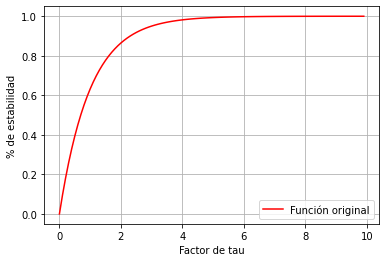

In [4]:
#Transformada inversa de Laplace en cada término de la respuesta en la frecuencia para encontrar cada término de la
#respuesta en el tiempo

yt_1 = sym.inverse_laplace_transform(Ys_original_primer_termino, s, t)
yt_2 = sym.inverse_laplace_transform(Ys_original_segundo_termino, s, t)

yt = (yt_1 + yt_2)/A                          #Se suman para encontrar la respuesta en el tiempo total

yt_str = str(A) + '(' + str(yt) + ')'

print('y(t) = ' + yt_str)

#Se hace una lista con varios puntos de la respuesta en el tiempo evaluada en algunos múltiplos de la constante de tiempo

x = np.arange(0, 10, 0.1)
y = []

for x_ in x:                     
    y.append(sym.sympify(yt).subs(t, x_/3))

plt.xlabel("Factor de tau")
plt.ylabel("% de estabilidad")
plt.plot(x, y, label = "Función original", color = "red")
plt.legend()
plt.grid()

Ahora, agregaremos un polo a la función de transferencia original, primero será un polo adicional a la derecha (recordando la manera gráfica de representar los polos) y luego uno a la izquierda.
Los polos adicionales que se utilizarán serán los siguientes:
   
   • Polo adicional a la derecha = $(s + 1)$
   
   • Polo adicional a la izquierda = $(s + 5)$
   
Añadido a esto también se hará la prueba con un polo que esté en el eje positivo, tal polo será $(s - 2)$

<h4>Añadiendo un polo adicional</h4>

En este punto, ya que es prácticamente igual que como se hizo anteriormente, a diferencia de que se agrega el polo y se calcula el coeficiente $C\$, simplemente se mostrará el resultado. Entonces, para el polo adicional a la derecha:

\begin{equation*}
    Y(s)=\frac{5}{s(s+3)(s+1)}=\frac{A}{s}+\frac{B}{s+3}+\frac{C}{s+1}
\end{equation*}

\begin{equation*}
    A=\frac{5}{(0+3)(0+1)}=\frac{5}{3}
\end{equation*}

\begin{equation*}
    B=\frac{5}{-3(-3+1)}=\frac{5}{6}
\end{equation*}

\begin{equation*}
    C=\frac{5}{-1(-1+3)}=-\frac{5}{2}
\end{equation*}

\begin{equation*}
    Y(s)=\frac{A}{s}+\frac{B}{s+3}+\frac{C}{s+1}=\frac{5}{3}\left(\frac{1}{s}\right)+\frac{5}{6}\left(\frac{1}{s+3}\right)-\frac{5}{2}\left(\frac{1}{s+1}\right)
\end{equation*}

\begin{equation*}
    y(t)=\frac{5}{3}+\frac{5}{6}e^{-3t}-\frac{5}{2}e^{-t}
\end{equation*}

En la expresión anterior tenemos que la respuesta forzada es $\frac{5}{3}$ y ya que la respuesta forzada de la función de transferencia original es $1$, se dividirá la función entre $\frac{5}{3}$ para hacer esta igual a $1$.

\begin{equation*}
    y(t)=\frac{\frac{5}{3}+\frac{5}{6}e^{-3t}-\frac{5}{2}e^{-t}}{\frac{5}{3}}=1+\frac{1}{2}e^{-3t}-\frac{3}{2}e^{-t}
\end{equation*}

Y ya que hicimos esta operación también resulta conveniente hacerla en la función de transferencia en términos de la frecuencia.

\begin{equation*}
    Y(s)=\frac{\frac{5}{s(s+3)(s+1)}}{\frac{5}{3}}=\frac{15}{5s(s+3)(s+1)}=\frac{3}{s(s+3)(s+1)}
\end{equation*}

Y esta última será la función de transferencia que se introducirá.

Introduce el valor del polo adicional a la derecha: -1
y(t) = (1.0*Heaviside(t) - 1.5*exp(-t)*Heaviside(t) + 0.5*exp(-3*t)*Heaviside(t))


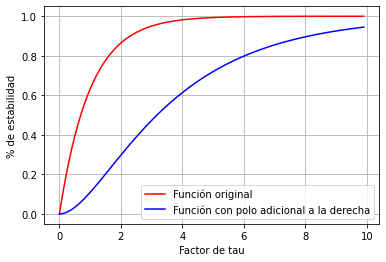

In [5]:
polo_adicional = float(input("Introduce el valor del polo adicional a la derecha: "))

Gs_derecha = (3*abs(polo_adicional))/((s + 3)*(s - polo_adicional))
Ys_derecha = (1/s) * Gs_derecha

As_derecha = s * Ys_derecha
Bs_derecha = (s + 3) * Ys_derecha
Cs_derecha = (s - polo_adicional) * Ys_derecha

A_derecha = sym.sympify(As_derecha).subs(s, 0)
B_derecha = sym.sympify(Bs_derecha).subs(s, -3)
C_derecha = sym.sympify(Cs_derecha).subs(s, polo_adicional)

Ys_derecha_primer_termino = A_derecha*(1/s)
Ys_derecha_segundo_termino = B_derecha*(1/(s + 3))
Ys_derecha_tercer_termino = C_derecha*(1/(s - polo_adicional))

yt_derecha_1 = sym.inverse_laplace_transform(Ys_derecha_primer_termino, s, t)
yt_derecha_2 = sym.inverse_laplace_transform(Ys_derecha_segundo_termino, s, t)
yt_derecha_3 = sym.inverse_laplace_transform(Ys_derecha_tercer_termino, s, t)

yt_derecha = (yt_derecha_1 + yt_derecha_2 + yt_derecha_3)

yt_derecha_str = '(' + str(yt_derecha) + ')'

print('y(t) = ' + yt_derecha_str)

y_derecha = []

for x_derecha in x:                     
    y_derecha.append(sym.sympify(yt_derecha).subs(t, x_derecha/3))

plt.xlabel("Factor de tau")
plt.ylabel("% de estabilidad")
plt.plot(x, y, label = "Función original", color = "red")
plt.plot(x, y_derecha, label = "Función con polo adicional a la derecha", color = "blue")
plt.legend()
plt.grid()

Cabe mencionar que a partir del procedimiento anterior para encontrar la función de transferencia que se introducirá al programa se puede hacer más general, esto, operando simplemente con una letra $p\$ en lugar de la posición del polo, haciendo esto obtenemos que:

\begin{equation*}
    Y(s)=\frac{5}{s(s+3)(s-p)}=\frac{A}{s}+\frac{B}{s+3}+\frac{C}{s-p}
\end{equation*}

\begin{equation*}
    A=\frac{5}{(0+3)(0-p)}=\frac{5}{-3p}
\end{equation*}

\begin{equation*}
    B=\frac{5}{-3(-3-p)}=\frac{5}{-9-3p}
\end{equation*}

\begin{equation*}
    C=\frac{5}{-p(-p+3)}=\frac{5}{p^{2}-3p}
\end{equation*}

\begin{equation*}
    Y(s)=\frac{A}{s}+\frac{B}{s+3}+\frac{C}{s-p}=\frac{5}{-3p}\left(\frac{1}{s}\right)+\frac{5}{-9-3p}\left(\frac{1}{s+3}\right)+\frac{5}{p^{2}-3p}\left(\frac{1}{s-p}\right)
\end{equation*}

\begin{equation*}
    y(t)=\frac{5}{-3p}+\frac{5}{-9-3p}e^{-3t}+\frac{5}{p^{2}-3p}e^{pt}
\end{equation*}

En la expresión anterior tenemos que la respuesta forzada es $\frac{5}{-3p}$ y ya que la respuesta forzada de la función de transferencia original es $1$, se dividirá la función entre $\frac{5}{-3p}$ para hacer esta igual a $1$.

\begin{equation*}
    y(t)=\frac{\frac{5}{-3p}+\frac{5}{-9-3p}e^{-3t}+\frac{5}{p^{2}-3p}e^{pt}}{\frac{5}{-3p}}=1+\frac{3p}{9+3p}e^{-3t}-\frac{15p}{5p^{2}-15p}e^{-t}
\end{equation*}

Y ya que hicimos esta operación también resulta conveniente hacerla en la función de transferencia en términos de la frecuencia.

\begin{equation*}
    Y(s)=\frac{\frac{5}{s(s+3)(s-p)}}{\frac{5}{-3p}}=\frac{-15p}{5s(s+3)(s-p)}=\frac{-3p}{s(s+3)(s-p)}
\end{equation*}

Y esta última será la función de transferencia que se introducirá.

Introduce el valor del polo adicional a la izquierda: -5
y(t) = (1.0*Heaviside(t) + 1.5*exp(-5.0*t)*Heaviside(t) - 2.5*exp(-3*t)*Heaviside(t))


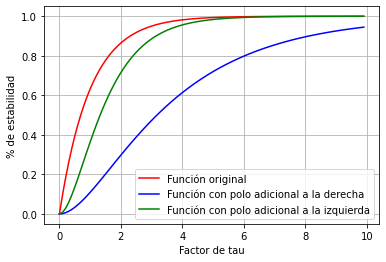

In [6]:
polo_adicional_1 = float(input("Introduce el valor del polo adicional a la izquierda: "))

Gs_izquierda = (3*abs(polo_adicional_1))/((s + 3)*(s - polo_adicional_1))
Ys_izquierda = (1/s) * Gs_izquierda

As_izquierda = s * Ys_izquierda
Bs_izquierda = (s + 3) * Ys_izquierda
Cs_izquierda = (s - polo_adicional_1) * Ys_izquierda

A_izquierda = sym.sympify(As_izquierda).subs(s, 0)
B_izquierda = sym.sympify(Bs_izquierda).subs(s, -3)
C_izquierda = sym.sympify(Cs_izquierda).subs(s, polo_adicional_1)

Ys_izquierda_primer_termino = A_izquierda*(1/s)
Ys_izquierda_segundo_termino = B_izquierda*(1/(s + 3))
Ys_izquierda_tercer_termino = C_izquierda*(1/(s - polo_adicional_1))

yt_izquierda_1 = sym.inverse_laplace_transform(Ys_izquierda_primer_termino, s, t)
yt_izquierda_2 = sym.inverse_laplace_transform(Ys_izquierda_segundo_termino, s, t)
yt_izquierda_3 = sym.inverse_laplace_transform(Ys_izquierda_tercer_termino, s, t)

yt_izquierda = (yt_izquierda_1 + yt_izquierda_2 + yt_izquierda_3)

yt_izquierda_str = '(' + str(yt_izquierda) + ')'

print('y(t) = ' + yt_izquierda_str)

y_izquierda = []

for x_izquierda in x:                     
    y_izquierda.append(sym.sympify(yt_izquierda).subs(t, x_izquierda/3))

plt.xlabel("Factor de tau")
plt.ylabel("% de estabilidad")
plt.plot(x, y, label = "Función original", color = "red")
plt.plot(x, y_derecha, label = "Función con polo adicional a la derecha", color = "blue")
plt.plot(x, y_izquierda, label = "Función con polo adicional a la izquierda", color = "green")
plt.legend()
plt.grid()

Adicionalmente, como ya se dijo antes, probaremos moviendo el polo adiciona al eje positivo, para esto usaremos el polo $(s-1)$ para ver qué pasa en este caso. Para esto simplemente se mostrará la gráfica, puesto que el procedimiento es exactamente el mismo que los anteriores.

Introduce el valor del polo adicional en el polo positivo: 1
y(t) = (0.75*exp(1.0*t)*Heaviside(t) - 1.0*Heaviside(t) + 0.25*exp(-3*t)*Heaviside(t))


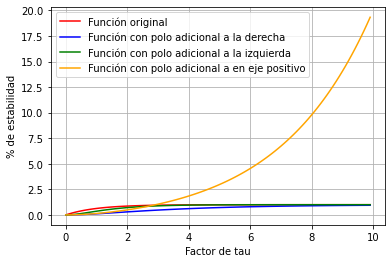

In [7]:
polo_eje_positivo = float(input("Introduce el valor del polo adicional en el polo positivo: "))

Gs_pos = (3*abs(polo_eje_positivo))/((s + 3)*(s - polo_eje_positivo))
Ys_pos = (1/s) * Gs_pos

As_pos = s * Ys_pos
Bs_pos = (s + 3) * Ys_pos
Cs_pos = (s - polo_eje_positivo) * Ys_pos

A_pos = sym.sympify(As_pos).subs(s, 0)
B_pos = sym.sympify(Bs_pos).subs(s, -3)
C_pos = sym.sympify(Cs_pos).subs(s, polo_eje_positivo)

Ys_pos_primer_termino = A_pos*(1/s)
Ys_pos_segundo_termino = B_pos*(1/(s + 3))
Ys_pos_tercer_termino = C_pos*(1/(s - polo_eje_positivo))

yt_pos_1 = sym.inverse_laplace_transform(Ys_pos_primer_termino, s, t)
yt_pos_2 = sym.inverse_laplace_transform(Ys_pos_segundo_termino, s, t)
yt_pos_3 = sym.inverse_laplace_transform(Ys_pos_tercer_termino, s, t)

yt_pos = (yt_pos_1 + yt_pos_2 + yt_pos_3)

yt_pos_str = '(' + str(yt_pos) + ')'

print('y(t) = ' + yt_pos_str)

y_pos = []

for x_pos in x:                     
    y_pos.append(sym.sympify(yt_pos).subs(t, x_pos/3))

plt.xlabel("Factor de tau")
plt.ylabel("% de estabilidad")
plt.plot(x, y, label = "Función original", color = "red")
plt.plot(x, y_derecha, label = "Función con polo adicional a la derecha", color = "blue")
plt.plot(x, y_izquierda, label = "Función con polo adicional a la izquierda", color = "green")
plt.plot(x, y_pos, label = "Función con polo adicional a en eje positivo", color = "orange")
plt.legend()
plt.grid()

Como podemos ver en la gráfica, cuando el polo está en el eje positivo, la respuesta en el tiempo se desestabiliza.

<h4>Añadiendo un polo y un cero adicionales</h4>

Ahora añadiremos aparte de un polo, un cero adicional a la función original, para el polo utilizaremos el mismo que se usó para cuando movimos a la izquierda el polo adicional del inciso anterior y como cero adicional elegiremos $(s+2)$ y lo moveremos a la izquierda a $(s+10)$ y al igual que antes, haremos una prueba en el eje positivo, en $(s-1)$, el prcedimiento para operar será el mismo que los anteriores, solo que la función ahora tendrá el siguiente aspecto (ya tomando en cuenta la entrada de escalón unitario):

\begin{equation*}
    Y(s)=\frac{5(s+2)}{s(s+3)(s+5)}=\frac{A}{s}+\frac{B}{s+3}+\frac{C}{s+5}
\end{equation*}

\begin{equation*}
    A=\frac{5(0+2)}{(0+3)(0+5)}=\frac{2}{3}
\end{equation*}

\begin{equation*}
    B=\frac{5(-3+2)}{-3(-3+5)}=\frac{5}{6}
\end{equation*}

\begin{equation*}
    C=\frac{5(-5+2)}{-5(-5+3)}=\frac{-3}{2}
\end{equation*}

\begin{equation*}
    Y(s)=\frac{A}{s}+\frac{B}{s+3}+\frac{C}{s+5}=\frac{2}{3}\left(\frac{1}{s}\right)+\frac{5}{6}\left(\frac{1}{s+3}\right)-\frac{3}{2}\left(\frac{1}{s+5}\right)
\end{equation*}

\begin{equation*}
    y(t)=\frac{2}{3}+\frac{5}{6}e^{-3t}-\frac{3}{2}e^{-5t}
\end{equation*}

\begin{equation*}
    y(t)=1 +\frac{5}{4}e^{-3t}-\frac{9}{4}e^{-5t}
\end{equation*}

Y la función que se ingresará es la siguiente:

\begin{equation*}
    Y(s)=\frac{\frac{15}{2}(s+2)}{s(s+3)(s+5)}
\end{equation*}

Y la forma general en que se debe introducir es la siguiente:

\begin{equation*}
    Y(s)=\frac{\frac{3p}{z}(s-z)}{s(s+3)(s-p)}
\end{equation*}

Donde $z$ representa el cero adicional.

Introduce el valor del polo adicional: -5
Introduce el valor del cero adicional a la derecha: -2
y(t) = (1.0*Heaviside(t) - 2.25*exp(-5.0*t)*Heaviside(t) + 1.25*exp(-3*t)*Heaviside(t))


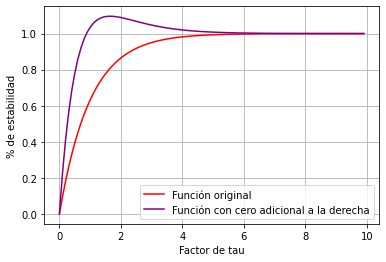

In [8]:
polo_adicional_2 = float(input("Introduce el valor del polo adicional: "))
cero_adicional = float(input("Introduce el valor del cero adicional a la derecha: "))

Gs_cero_derecha = ((3*abs(polo_adicional_2)/abs(cero_adicional))*(s - cero_adicional))/((s + 3)*(s - polo_adicional_2))
Ys_cero_derecha = (1/s) * Gs_cero_derecha

As_cero_derecha = s * Ys_cero_derecha
Bs_cero_derecha = (s + 3) * Ys_cero_derecha
Cs_cero_derecha = (s - polo_adicional_2) * Ys_cero_derecha

A_cero_derecha = sym.sympify(As_cero_derecha).subs(s, 0)
B_cero_derecha = sym.sympify(Bs_cero_derecha).subs(s, -3)
C_cero_derecha = sym.sympify(Cs_cero_derecha).subs(s, polo_adicional_2)

Ys_cero_derecha_primer_termino = A_cero_derecha*(1/s)
Ys_cero_derecha_segundo_termino = B_cero_derecha*(1/(s + 3))
Ys_cero_derecha_tercer_termino = C_cero_derecha*(1/(s - polo_adicional_2))

yt_cero_derecha_1 = sym.inverse_laplace_transform(Ys_cero_derecha_primer_termino, s, t)
yt_cero_derecha_2 = sym.inverse_laplace_transform(Ys_cero_derecha_segundo_termino, s, t)
yt_cero_derecha_3 = sym.inverse_laplace_transform(Ys_cero_derecha_tercer_termino, s, t)

yt_cero_derecha = (yt_cero_derecha_1 + yt_cero_derecha_2 + yt_cero_derecha_3)

yt_cero_derecha_str = '(' + str(yt_cero_derecha) + ')'

print('y(t) = ' + yt_cero_derecha_str)

y_cero_derecha = []

for x_cero_derecha in x:                     
    y_cero_derecha.append(sym.sympify(yt_cero_derecha).subs(t, x_cero_derecha/3))

plt.xlabel("Factor de tau")
plt.ylabel("% de estabilidad")
plt.plot(x, y, label = "Función original", color = "red")
plt.plot(x, y_cero_derecha, label = "Función con cero adicional a la derecha", color = "purple")
plt.legend()
plt.grid()

La respuesta de la función con el cero adicional parece que se extingue antes, por la forma de la gráfica, sin embargo, tarda más en estabilizarse, con respecto a la función original.
A continuación se muestra la respuesta en el tiempo para un cero a la izquierda $(s+5)$.

Introduce el valor del cero adicional a la derecha: -10
y(t) = (1.0*Heaviside(t) + 0.75*exp(-5.0*t)*Heaviside(t) - 1.75*exp(-3*t)*Heaviside(t))


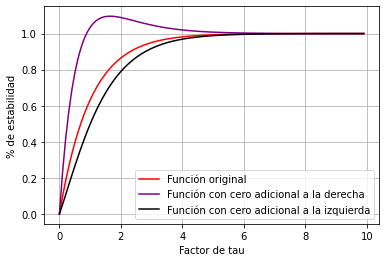

In [9]:
cero_adicional_1 = float(input("Introduce el valor del cero adicional a la derecha: "))

Gs_cero_izquierda = ((3*abs(polo_adicional_2)/abs(cero_adicional_1))*(s - cero_adicional_1))/((s + 3)*(s - polo_adicional_2))
Ys_cero_izquierda = (1/s) * Gs_cero_izquierda

As_cero_izquierda = s * Ys_cero_izquierda
Bs_cero_izquierda = (s + 3) * Ys_cero_izquierda
Cs_cero_izquierda = (s - polo_adicional_2) * Ys_cero_izquierda

A_cero_izquierda = sym.sympify(As_cero_izquierda).subs(s, 0)
B_cero_izquierda = sym.sympify(Bs_cero_izquierda).subs(s, -3)
C_cero_izquierda = sym.sympify(Cs_cero_izquierda).subs(s, polo_adicional_2)

Ys_cero_izquierda_primer_termino = A_cero_izquierda*(1/s)
Ys_cero_izquierda_segundo_termino = B_cero_izquierda*(1/(s + 3))
Ys_cero_izquierda_tercer_termino = C_cero_izquierda*(1/(s - polo_adicional_2))

yt_cero_izquierda_1 = sym.inverse_laplace_transform(Ys_cero_izquierda_primer_termino, s, t)
yt_cero_izquierda_2 = sym.inverse_laplace_transform(Ys_cero_izquierda_segundo_termino, s, t)
yt_cero_izquierda_3 = sym.inverse_laplace_transform(Ys_cero_izquierda_tercer_termino, s, t)

yt_cero_izquierda = (yt_cero_izquierda_1 + yt_cero_izquierda_2 + yt_cero_izquierda_3)

yt_cero_izquierda_str = '(' + str(yt_cero_izquierda) + ')'

print('y(t) = ' + yt_cero_izquierda_str)

y_cero_izquierda = []

for x_cero_izquierda in x:                     
    y_cero_izquierda.append(sym.sympify(yt_cero_izquierda).subs(t, x_cero_izquierda/3))

plt.xlabel("Factor de tau")
plt.ylabel("% de estabilidad")
plt.plot(x, y, label = "Función original", color = "red")
plt.plot(x, y_cero_derecha, label = "Función con cero adicional a la derecha", color = "purple")
plt.plot(x, y_cero_izquierda, label = "Función con cero adicional a la izquierda", color = "black")
plt.legend()
plt.grid()

A continuación, la respuesta en tiempo con un cero positivo.

Introduce el valor del cero adicional positivo: 1
y(t) = (-1.0*Heaviside(t) - 9.0*exp(-5.0*t)*Heaviside(t) + 10.0*exp(-3*t)*Heaviside(t))


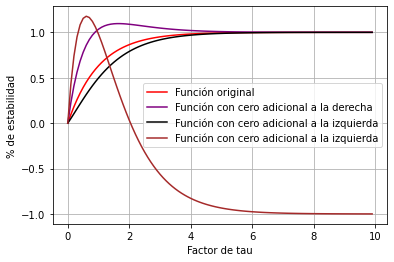

In [10]:
cero_adicional_pos = float(input("Introduce el valor del cero adicional positivo: "))

Gs_cero_pos = ((3*abs(polo_adicional_2)/abs(cero_adicional_pos))*(s - cero_adicional_pos))/((s + 3)*(s - polo_adicional_2))
Ys_cero_pos = (1/s) * Gs_cero_pos

As_cero_pos = s * Ys_cero_pos
Bs_cero_pos = (s + 3) * Ys_cero_pos
Cs_cero_pos = (s - polo_adicional_2) * Ys_cero_pos

A_cero_pos = sym.sympify(As_cero_pos).subs(s, 0)
B_cero_pos = sym.sympify(Bs_cero_pos).subs(s, -3)
C_cero_pos = sym.sympify(Cs_cero_pos).subs(s, polo_adicional_2)

Ys_cero_pos_primer_termino = A_cero_pos*(1/s)
Ys_cero_pos_segundo_termino = B_cero_pos*(1/(s + 3))
Ys_cero_pos_tercer_termino = C_cero_pos*(1/(s - polo_adicional_2))

yt_cero_pos_1 = sym.inverse_laplace_transform(Ys_cero_pos_primer_termino, s, t)
yt_cero_pos_2 = sym.inverse_laplace_transform(Ys_cero_pos_segundo_termino, s, t)
yt_cero_pos_3 = sym.inverse_laplace_transform(Ys_cero_pos_tercer_termino, s, t)

yt_cero_pos = (yt_cero_pos_1 + yt_cero_pos_2 + yt_cero_pos_3)

yt_cero_pos_str = '(' + str(yt_cero_pos) + ')'

print('y(t) = ' + yt_cero_pos_str)

y_cero_pos = []

for x_cero_pos in x:                     
    y_cero_pos.append(sym.sympify(yt_cero_pos).subs(t, x_cero_pos/3))

plt.xlabel("Factor de tau")
plt.ylabel("% de estabilidad")
plt.plot(x, y, label = "Función original", color = "red")
plt.plot(x, y_cero_derecha, label = "Función con cero adicional a la derecha", color = "purple")
plt.plot(x, y_cero_izquierda, label = "Función con cero adicional a la izquierda", color = "black")
plt.plot(x, y_cero_pos, label = "Función con cero adicional a la izquierda", color = "brown")
plt.legend()
plt.grid()

<h4>Conclusiones</h4>

Resumen de gráficas de respuestas en el tiempo del sistema de primer orden con las modificaciones que se agregaron a la función original, a excepción de aquellas donde el polo o el cero es positivo, debido a que estos valores desestabilizan a la respuesta y al compararlas con las otras, harían difícil ver las que no están inestables.

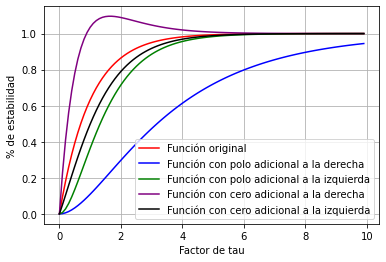

In [11]:
plt.xlabel("Factor de tau")
plt.ylabel("% de estabilidad")
plt.plot(x, y, label = "Función original", color = "red")
plt.plot(x, y_derecha, label = "Función con polo adicional a la derecha", color = "blue")
plt.plot(x, y_izquierda, label = "Función con polo adicional a la izquierda", color = "green")
#plt.plot(x, y_pos, label = "Función con polo adicional a en eje positivo", color = "orange")
plt.plot(x, y_cero_derecha, label = "Función con cero adicional a la derecha", color = "purple")
plt.plot(x, y_cero_izquierda, label = "Función con cero adicional a la izquierda", color = "black")
#plt.plot(x, y_cero_pos, label = "Función con cero adicional a la izquierda", color = "brown")
plt.legend()
plt.grid()

A partir de las graficas se identifica que mientras los polos y ceros sean positivos, la respuesta en el tiempo no sufre alguna inestabilidad, cosa que sí pasa cuando estos valores son positivos, es interesante ver cómo es que entre más alejado estén los polos y los ceros del punto de referencia en el plano complejo, las respuestas se extinguen más rápido, en comparación con los que se encuentran más cerca.